### 线性回归简介

线性回归是一种用于预测和建模的基本机器学习算法。它通过建立输入特征与输出变量之间的线性关系来进行预测。

#### 1. 基本概念

- **目标**: 预测一个连续的数值（例如房价、温度等）。
- **模型形式**: 线性回归模型的基本形式为：
  
  $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$

  其中：
  - $ y $ 是预测值（因变量）。
  - $x_1, x_2, \ldots, x_n$ 是输入特征（自变量）。
  - $\beta_0$ 是截距项。
  - $\beta_1, \beta_2, \ldots, \beta_n$ 是特征的权重（系数）。
  - $\epsilon$ 是误差项。

#### 2. 线性回归的类型

- **简单线性回归**: 只有一个特征（自变量）。
  
  $$ y = \beta_0 + \beta_1 x + \epsilon $$

- **多元线性回归**: 有多个特征（自变量）。

#### 3. 训练过程

- **损失函数**: 通常使用均方误差（MSE）作为损失函数，用于评估模型的预测性能：

  $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

  其中，$y_i$ 是真实值，$\hat{y}_i$ 是预测值。

- **优化方法**: 通过最小化损失函数来优化模型参数（如使用梯度下降法）。

#### 4. 优点与缺点

- **优点**:
  - 简单易懂，易于实现和解释。
  - 计算效率高，适用于大规模数据集。

- **缺点**:
  - 对线性关系的假设，无法处理复杂的非线性关系。
  - 对异常值敏感，可能影响模型的性能。

#### 5. 应用场景

- 房价预测
- 销售额预测
- 经济指标分析

### 总结

线性回归是机器学习中一种基础而重要的算法，适用于许多实际问题。虽然它有一些局限性，但在许多情况下，仍然是一个有效的预测工具。

In [3]:
# pip install sklearn
# pip install numpy
# pip install matplotlib

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## 数据集介绍
+ Automobile - https://archive.ics.uci.edu/dataset/10/automobile

该数据集包含三类实体：(a) 汽车各项特性的规格说明，(b) 其指定的​​保险风险评级，(c) 与其他汽车相比，其标准化使用损失。第二个评级对应于汽车风险高于其价格的程度。汽车最初会被分配一个与其价格相关的风险因子符号。然后，如果汽车风险较高（或较低），则通过上调（或下调）该符号来调整。精算师将此过程称为“符号化”。+3 表示汽车风险较高，-3 表示汽车可能相当安全。

第三个因子是每辆投保车辆每年的相对平均损失赔付。该值针对特定尺寸类别（双门小型车、旅行车、运动型/特种车等）内的所有汽车进行了标准化，代表每辆车每年的平均损失。


| Attribute                | Attribute Range                                  |
|--------------------------|--------------------------------------------------|
| 1. symboling             | -3, -2, -1, 0, 1, 2, 3.(风险指数)|
| 2. normalized-losses     | continuous from 65 to 256.(每年的相对平均损失赔付)|
| 3. make                  | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugeot, renault, saab, subaru, toyota, volkswagen, volvoplymouth, porsche(汽车品牌)|
| 4. fuel-type             | diesel, gas.(发动机类型)|
| 5. aspiration            | std, turbo.                                      |
| 6. num-of-doors          | four, two.                                       |
| 7. body-style            | hardtop, wagon, sedan, hatchback, convertible.   |
| 8. drive-wheels          | 4wd, fwd, rwd.                                   |
| 9. engine-location       | front, rear.                                     |
| 10. wheel-base           | continuous from 86.6 to 120.9.                   |
| 11. length               | continuous from 141.1 to 208.1.                  |
| 12. width                | continuous from 60.3 to 72.3.                    |
| 13. height               | continuous from 47.8 to 59.8.                    |
| 14. curb-weight          | continuous from 1488 to 4066.(整备质量)|
| 15. engine-type          | dohc, dohcv, l, ohc, ohcf, ohcv, rotor.          |
| 16. num-of-cylinders     | eight, five, four, six, three, twelve, two.      |
| 17. engine-size          | continuous from 61 to 326.(发动机大小)|
| 18. fuel-system          | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.    |
| 19. bore                 | continuous from 2.54 to 3.94.                     |
| 20. stroke               | continuous from 2.07 to 4.17.(冲程)|
| 21. compression-ratio    | continuous from 7 to 23.(压缩比)|
| 22. horsepower           | continuous from 48 to 288.(马力)|
| 23. peak-rpm             | continuous from 4150 to 6600.(峰值转速)|
| 24. city-mpg             | continuous from 13 to 49.(城市每加仑英里数)|
| 25. highway-mpg          | continuous from 16 to 54.(高速每加仑英里数)|
| 26. price                | continuous from 5118 to 45400.(售价)|

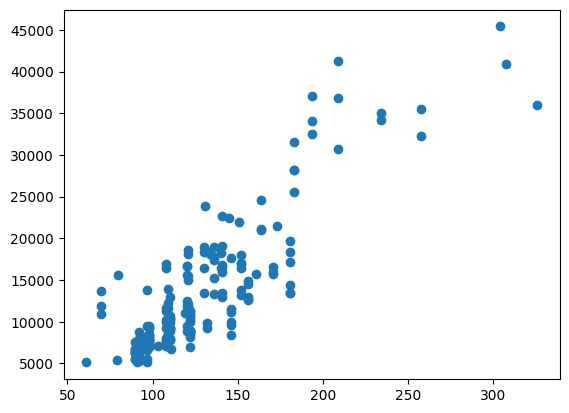

In [4]:
data = np.genfromtxt('datasets/automobile/imports-85.csv', delimiter=',')

# 使用布尔索引过滤 NaN 值
mask = ~np.isnan(data[:, 16]) & ~np.isnan(data[:, 25])

# 提取有效的 x_data 和 y_data
x_data = data[mask, 16]
y_data = data[mask, 25]

plt.scatter(x=x_data, y=y_data)
plt.show()

In [3]:
_x_data = data[mask, 16][:, np.newaxis]  # 增加一个维度
_y_data = data[mask, 25][:, np.newaxis]  # 增加一个维度
model = LinearRegression()
model.fit(_x_data, _y_data)

LinearRegression()

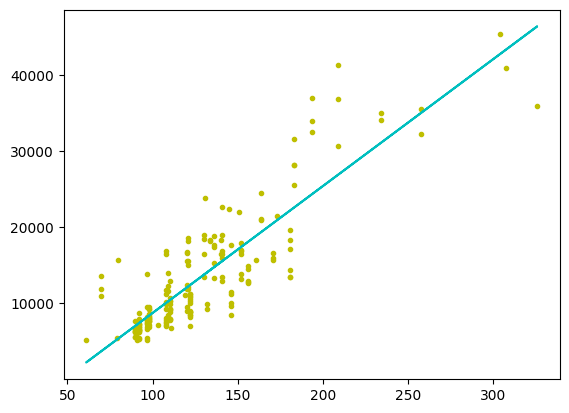

In [4]:
plt.plot(_x_data, _y_data, 'y.')
plt.plot(_x_data, model.predict(_x_data), 'c')
plt.show()

### 梯度下降法实现线性回归模型

1. **损失函数**：
   该代码的目的是最小化均方误差（MSE），其公式为：

   $$
   \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - (k \cdot x^{(i)} + b))^2
   $$

   其中：
   - $y^{(i)}$ 是第 $i$ 个样本的真实值。
   - $x^{(i)}$ 是第 $i$ 个样本的特征值。
   - $m$ 是样本的总数。

2. **梯度计算**：
   为了更新参数 $b$ 和 $k$，我们需要计算损失函数相对于这些参数的梯度。

   - **对于截距 $b$** 的梯度：

   $$
   \frac{\partial \text{MSE}}{\partial b} = -\frac{2}{m} \sum_{i=1}^{m} (y^{(i)} - (k \cdot x^{(i)} + b))
   $$

   - **对于斜率 $k$** 的梯度：

   $$
   \frac{\partial \text{MSE}}{\partial k} = -\frac{2}{m} \sum_{i=1}^{m} x^{(i)} (y^{(i)} - (k \cdot x^{(i)} + b))
   $$

3. **参数更新**：
   使用计算得到的梯度来更新参数 $b$ 和 $k$：

   - 更新截距 $b$ 的公式：

   $$
   b := b - \text{lr} \cdot \frac{\partial \text{MSE}}{\partial b}
   $$

   - 更新斜率 $k$ 的公式：

   $$
   k := k - \text{lr} \cdot \frac{\partial \text{MSE}}{\partial k}
   $$

### 总结

综上所述，代码中实现的梯度下降算法通过计算损失函数（均方误差）关于参数 $b$ 和 $k$ 的梯度，并使用这些梯度来更新参数，以最小化损失函数，从而优化线性回归模型的性能。

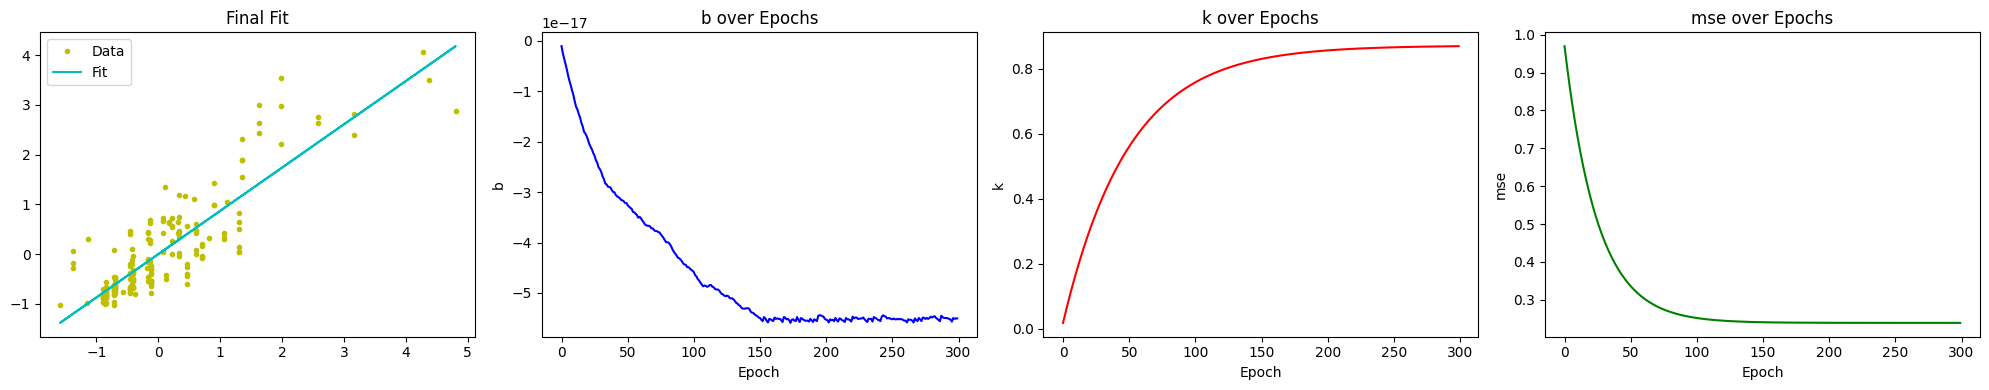

In [5]:
# 初始化参数
lr = 0.01
b = 0      # 初始截距
k = 0      # 初始斜率
epochs = 300  # 迭代次数

x_mean, x_std = np.mean(x_data), np.std(x_data)
y_mean, y_std = np.mean(y_data), np.std(y_data)
x_norm = (x_data - x_mean) / x_std
y_norm = (y_data - y_mean) / y_std

# 计算MSE
def compute_mse(_b, _k, xd, yd):
    total_error = np.sum((yd - (_k * xd + _b)) ** 2)
    return total_error / len(xd)

# 梯度下降优化
def gradient_descent(xd, yd, _b, _k, _lr, _epochs):
    m = len(xd)
    _b_history = []
    _k_history = []
    _mse_history = []

    for i in range(_epochs):
        # 计算梯度
        y_pred = _k * xd + _b
        b_grad = -(2/m) * np.sum(yd - y_pred)  # 截距梯度
        k_grad = -(2/m) * np.sum(xd * (yd - y_pred))  # 斜率梯度

        # 更新参数
        _b -= _lr * b_grad
        _k -= _lr * k_grad

        # 记录历史值
        _b_history.append(_b)
        _k_history.append(_k)
        _mse_history.append(compute_mse(_b, _k, xd, yd))

    return _b, _k, _b_history, _k_history, _mse_history

# 运行梯度下降
b, k, b_history, k_history, mse_history = gradient_descent(x_norm, y_norm, b, k, lr, epochs)
# 拟合结果图
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(x_norm, y_norm, 'y.', label='Data')
plt.plot(x_norm, [k * x + b for x in x_norm], 'c', label='Fit')
plt.title('Final Fit')
plt.legend()

# b 变化图
plt.subplot(1, 4, 2)
plt.plot(b_history, 'b')
plt.title('b over Epochs')
plt.xlabel('Epoch')
plt.ylabel('b')

# k 变化图
plt.subplot(1, 4, 3)
plt.plot(k_history, 'r')
plt.title('k over Epochs')
plt.xlabel('Epoch')
plt.ylabel('k')

# mse 变化图
plt.subplot(1, 4, 4)
plt.plot(mse_history, 'g')
plt.title('mse over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mse')

plt.tight_layout()
plt.show()

### 拓展链接
+ 偏导数 - https://zh.wikipedia.org/wiki/%E5%81%8F%E5%AF%BC%E6%95%B0

# 凸函数

### 什么是凸函数（Convex Function）？

在数学中，**凸函数**是定义在某个区间上的实值函数，它满足这样一个条件：

> **在任意两点之间，连线都在图像的上方或与图像重合。**

换句话说，一个函数 $ f(x) $ 是凸的，当对于区间上的任意两个点 $ x_1, x_2 $，以及 $ \lambda \in [0,1] $，都有：

$$
f(\lambda x_1 + (1 - \lambda) x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2)
$$

这称为**凸性不等式**。

---

### 图像理解

- 函数图像“朝上凹”或“开口向上”就是凸函数（比如 $ f(x) = x^2 $）
- 如果图像“朝下凸”或“开口向下”，那是**凹函数**（concave function），即凸函数的相反概念。

---

### 凸函数的性质

1. **局部最小即全局最小**：在凸函数中，如果某点是局部最小点，那么它就是全局最小点。
2. **导数性质**：
   - 若 $ f $ 可导，则函数是凸的 ↔ $ f' $ 单调不减。
   - 若 $ f $ 二阶可导，则函数是凸的 ↔ $ f''(x) \geq 0 $。
3. **凸函数 + 凸函数 = 凸函数**。
4. **凸函数的非负加权和也是凸函数**。

# 标准方程法实现线性回归

在机器学习中，**标准方程法（Normal Equation）** 是一种用于直接求解线性回归模型参数（权重）的解析方法。它通过数学推导一次性计算出最优参数，*避免了迭代优化过程（如梯度下降）*。以下是关键点总结：

---

### **1. 核心思想**

• **目标**：最小化线性回归的损失函数（均方误差，MSE）。

• **方法**：对损失函数关于参数向量求导，并令导数为零，直接解出最优参数。

---

### **2. 公式**
对于线性模型 $ y = X\theta + \epsilon $（$X$ 为设计矩阵，$\theta$ 为参数向量），最优参数 $\theta$ 的解为：
$$
\theta = (X^T X)^{-1} X^T y
$$
• **前提**：矩阵 $X^T X$ 必须可逆（即 $X$ 列满秩）。

---

### **3. 优缺点**
+ **优点**：

    + **无需学习率或迭代**：直接得到解析解。

    + **计算高效**：当特征维度 $n$ 较小时（如 $n < 10^4$），计算速度快。

+ **缺点**：
    + **计算复杂度高**：矩阵求逆的复杂度为 $O(n^3)$，特征多时计算昂贵。

    + **需矩阵可逆**：若 $X^T X$ 奇异（如特征共线），需使用伪逆或正则化（如岭回归）。

---

### **4. 与梯度下降对比**
| **标准方程法** | **梯度下降**    |
|-----------|-------------|
| 直接解析解     | 迭代逼近最优解     |
| 无需调学习率    | 需选择学习率和迭代次数 |
| 适合小规模数据   | 适合大规模或高维数据  |
| 一次计算完成    | 多次迭代更新参数    |

举例说明标准方程法如何一步求出 MSE 的极小值

### **5. 举例说明**

太好了！那我们就更通俗一点，每一步都详细写出矩阵是怎么展开的，让你能看清楚每个元素是怎么来的。不需要你完全懂线性代数，咱们一点点来看。

我们还是用一个小例子来讲解：
假设我们有 3 个样本，每个样本只有 1 个特征（比如房子的面积），目标是预测房价：

| 样本编号 | 特征 x（面积） | 目标 y（房价） |
|------|----------|----------|
| 1    | 1        | 2        |
| 2    | 2        | 3        |
| 3    | 3        | 4        |

---

## 🔢 第一步：构造矩阵 X 和向量 y

我们加上一列全是 1 的偏置项（为了学到截距 $ \theta_0 $）：

$$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}
\quad
y =
\begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}
$$

注意：
- 每一行代表一个样本
- 第 1 列是 1（偏置项）
- 第 2 列是特征值 x
- y 是每个样本对应的输出值

---

## ✍️ 第二步：计算 $ X^T X $

$ X^T $ 是 X 的转置（行列互换）：

$$
X^T =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
$$

现在我们计算：

$$
X^T X =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3
\end{bmatrix}
$$

我们来一项一项地乘出来（2×3 乘 3×2，结果是 2×2）：

- 第 1 行第 1 列：
  $$
  1×1 + 1×1 + 1×1 = 3
  $$
- 第 1 行第 2 列：
  $$
  1×1 + 1×2 + 1×3 = 6
  $$
- 第 2 行第 1 列：
  $$
  1×1 + 2×1 + 3×1 = 6
  $$
- 第 2 行第 2 列：
  $$
  1×1 + 2×2 + 3×3 = 14
  $$

结果：

$$
X^T X =
\begin{bmatrix}
3 & 6 \\
6 & 14
\end{bmatrix}
$$

---

## ✍️ 第三步：计算 $ X^T y $

我们还是用刚才的 $ X^T $，乘上 y：

$$
X^T =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 2 & 3
\end{bmatrix}
\quad
y =
\begin{bmatrix}
2 \\
3 \\
4
\end{bmatrix}
$$

相乘（2×3 乘 3×1，结果是 2×1 向量）：

- 第 1 行：
  $$
  1×2 + 1×3 + 1×4 = 9
  $$
- 第 2 行：
  $$
  1×2 + 2×3 + 3×4 = 20
  $$

结果：

$$
X^T y =
\begin{bmatrix}
9 \\
20
\end{bmatrix}
$$

---

## ✍️ 第四步：计算 $ (X^T X)^{-1} $

我们现在有：

$$
X^T X =
\begin{bmatrix}
3 & 6 \\
6 & 14
\end{bmatrix}
$$

我们要求它的逆矩阵 $ (X^T X)^{-1} $

2×2 矩阵的逆矩阵公式是：

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}^{-1}
=
\frac{1}{ad - bc}
\begin{bmatrix}
d & -b \\
-c & a
\end{bmatrix}
$$

带入：

- $ a = 3, b = 6, c = 6, d = 14 $
- 行列式：$ ad - bc = 3×14 - 6×6 = 42 - 36 = 6 $

所以：

$$
(X^T X)^{-1} =
\frac{1}{6}
\begin{bmatrix}
14 & -6 \\
-6 & 3
\end{bmatrix}
=
\begin{bmatrix}
14/6 & -1 \\
-1 & 0.5
\end{bmatrix}
$$

---

## ✍️ 第五步：代入标准方程公式求 $ \theta $

公式是：

$$
\theta = (X^T X)^{-1} X^T y
$$

我们代入：

$$
\theta =
\begin{bmatrix}
14/6 & -1 \\
-1 & 0.5
\end{bmatrix}
\cdot
\begin{bmatrix}
9 \\
20
\end{bmatrix}
$$

手动计算：

- 第 1 行：
  $$
  \frac{14}{6}×9 + (-1)×20 = 21 - 20 = 1
  $$
- 第 2 行：
  $$
  -1×9 + 0.5×20 = -9 + 10 = 1
  $$

结果：

$$
\theta =
\begin{bmatrix}
1 \\
1
\end{bmatrix}
$$

---

## ✅ 最终模型

我们找到的回归模型是：

$$
\hat{y} = 1 + 1 \cdot x
$$

也就是说：

- 当 x = 1，预测 y = 2
- 当 x = 2，预测 y = 3
- 当 x = 3，预测 y = 4

完美拟合原始数据！

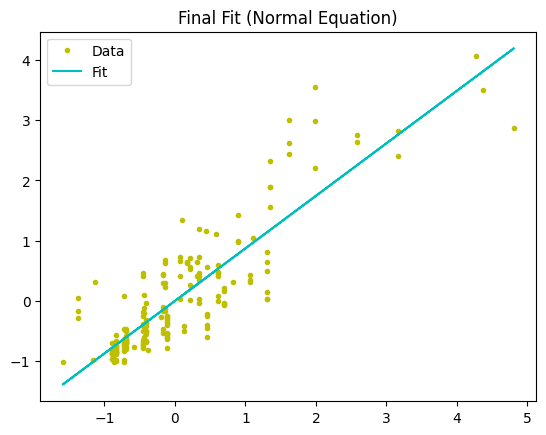

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 标准化数据
x_mean, x_std = np.mean(x_data), np.std(x_data)
y_mean, y_std = np.mean(y_data), np.std(y_data)
x_norm = (x_data - x_mean) / x_std
y_norm = (y_data - y_mean) / y_std

# 添加偏置项（截距），构建X矩阵
X = np.c_[np.ones(len(x_norm)), x_norm]  # shape: (n_samples, 2)
y = y_norm.reshape(-1, 1)                # shape: (n_samples, 1)

# 标准方程解：theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# 提取参数
b, k = theta[0, 0], theta[1, 0]

# 绘制拟合图像
plt.plot(x_norm, y_norm, 'y.', label='Data')
plt.plot(x_norm, k * x_norm + b, 'c', label='Fit')
plt.title('Final Fit (Normal Equation)')
plt.legend()
plt.show()
